In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\miran\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Initial data import

In [ ]:
'''#Import data
filename = 'Motor_Vehicle_Collisions_-_Crashes_20250415.csv'

df = pd.read_csv(filename)

#Print the header
#print(df.head())

#split up the date into year, month, day
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')
df['Year'] = df['CRASH DATE'].dt.year

#print(df.head())

# Remove years 2012 and 2025
df = df[(df['Year'] != 2012) & (df['Year'] != 2025)]

#print(df.head())

# Save the merged DataFrame to a CSV file
df.to_csv("sorted_data.csv", index=False)'''

### Fundamental distributions

In [3]:
file = 'sorted_data.csv'

data = pd.read_csv(file)

C:\Users\miran\AppData\Local\Temp\ipykernel_2556\2640694134.py:3: DtypeWarning: Columns (3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)


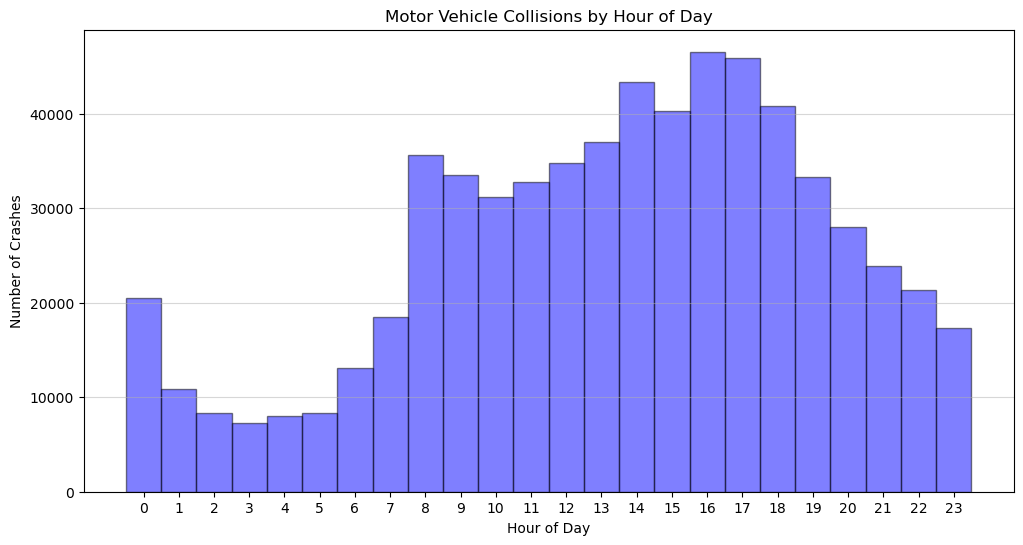

In [9]:
# Sort the time of day into hours only
data['Hour'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M').dt.hour

# Plot the crashes at the time of day
plt.figure(figsize=(12, 6))
plt.hist(data['Hour'], bins=np.arange(0, 25) - 0.5, color='blue', alpha=0.5, edgecolor='black', align='mid')
plt.title('Motor Vehicle Collisions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.xticks(np.arange(0, 24, 1))
plt.grid(axis='y', alpha=0.5)
plt.show()


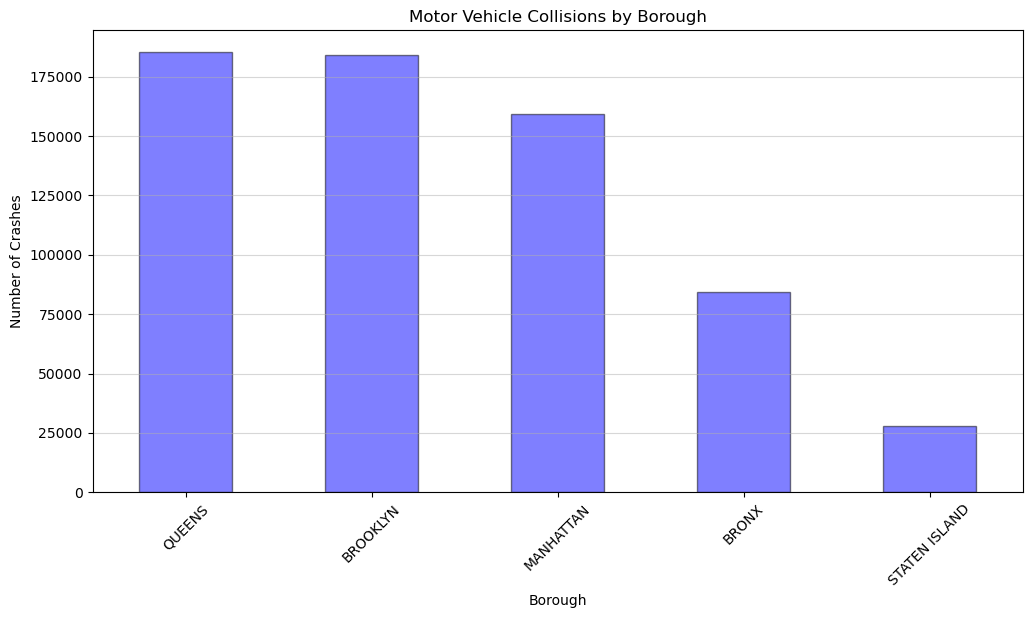

In [10]:
# Plot the crashes by borrough
plt.figure(figsize=(12, 6))
data['BOROUGH'].value_counts().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Motor Vehicle Collisions by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()
